In [12]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [13]:
sys.path.append(os.path.abspath(os.path.join('..')))

In [14]:
from NeuralNetwork.NeuralNetwork import Network
from NeuralNetwork.Layer import Dense, Input
from NeuralNetwork.Activation import Sigmoid
from NeuralNetwork.Loss import MSE
from Metrics import Metric, Plot

In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Предобработка данных

## Загрузка данных

In [16]:
df = pd.read_csv('Mushroom_dataset.csv', names=['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], header=None)
rows, columns = df.shape

## Описание данных

In [17]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
1,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
2,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS
3,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS
4,EDIBLE,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS


In [18]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [19]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [20]:
for column in df.columns:
    print(f"{column}: ")
    print(df[column].unique())

class: 
['EDIBLE' 'POISONOUS']
cap-shape: 
['CONVEX' 'FLAT' 'BELL' 'SUNKEN' 'KNOBBED' 'CONICAL']
cap-surface: 
['SMOOTH' 'FIBROUS' 'SCALY' 'GROOVES']
cap-color: 
['WHITE' 'YELLOW' 'BROWN' 'GRAY' 'RED' 'PINK' 'PURPLE' 'GREEN' 'BUFF'
 'CINNAMON']
bruises: 
['BRUISES' 'NO']
odor: 
['ALMOND' 'ANISE' 'NONE' 'PUNGENT' 'CREOSOTE' 'FOUL' 'FISHY' 'SPICY'
 'MUSTY']
gill-attachment: 
['FREE' 'ATTACHED']
gill-spacing: 
['CROWDED' 'CLOSE']
gill-size: 
['NARROW' 'BROAD']
gill-color: 
['WHITE' 'PINK' 'BROWN' 'GRAY' 'BLACK' 'CHOCOLATE' 'PURPLE' 'GREEN' 'RED'
 'BUFF' 'YELLOW' 'ORANGE']
stalk-shape: 
['TAPERING' 'ENLARGING']
stalk-root: 
['BULBOUS' 'CLUB' 'ROOTED' 'EQUAL' '?']
stalk-surface-above-ring: 
['SMOOTH' 'FIBROUS' 'SILKY' 'SCALY']
stalk-surface-below-ring: 
['SMOOTH' 'SCALY' 'FIBROUS' 'SILKY']
stalk-color-above-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'CINNAMON' 'YELLOW' 'ORANGE']
stalk-color-below-ring: 
['WHITE' 'PINK' 'GRAY' 'BUFF' 'BROWN' 'RED' 'YELLOW' 'CINNAMON' 'ORANGE']
veil-t

In [21]:
params = pd.DataFrame()
params.index = ['Количество', '% пропусков', 'Мощность', 'Мода', 'Частота']
for column in df.columns:
    params[column] = [len(df[column]), df[column].isna().sum() * 100 / len(df[column]), df[column].nunique(), df[column].mode().values[0], df[column].value_counts()[df[column].mode().values[0]]]

params = params.style.apply(lambda x: ["background-color:tomato" if i==1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:limegreen" if i!=1 else "" for i in x], axis=1, subset=(['Мощность'], slice(None))).apply(lambda x: ["background-color:tomato" if i>=60 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:steelblue" if i<60 and i >= 30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None))).apply(lambda x: ["background-color:limegreen" if i<30 else "" for i in x], axis=1, subset=(['% пропусков'], slice(None)))
params

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Количество,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
% пропусков,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Мощность,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
Мода,EDIBLE,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS
Частота,4488,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160


## Распределения

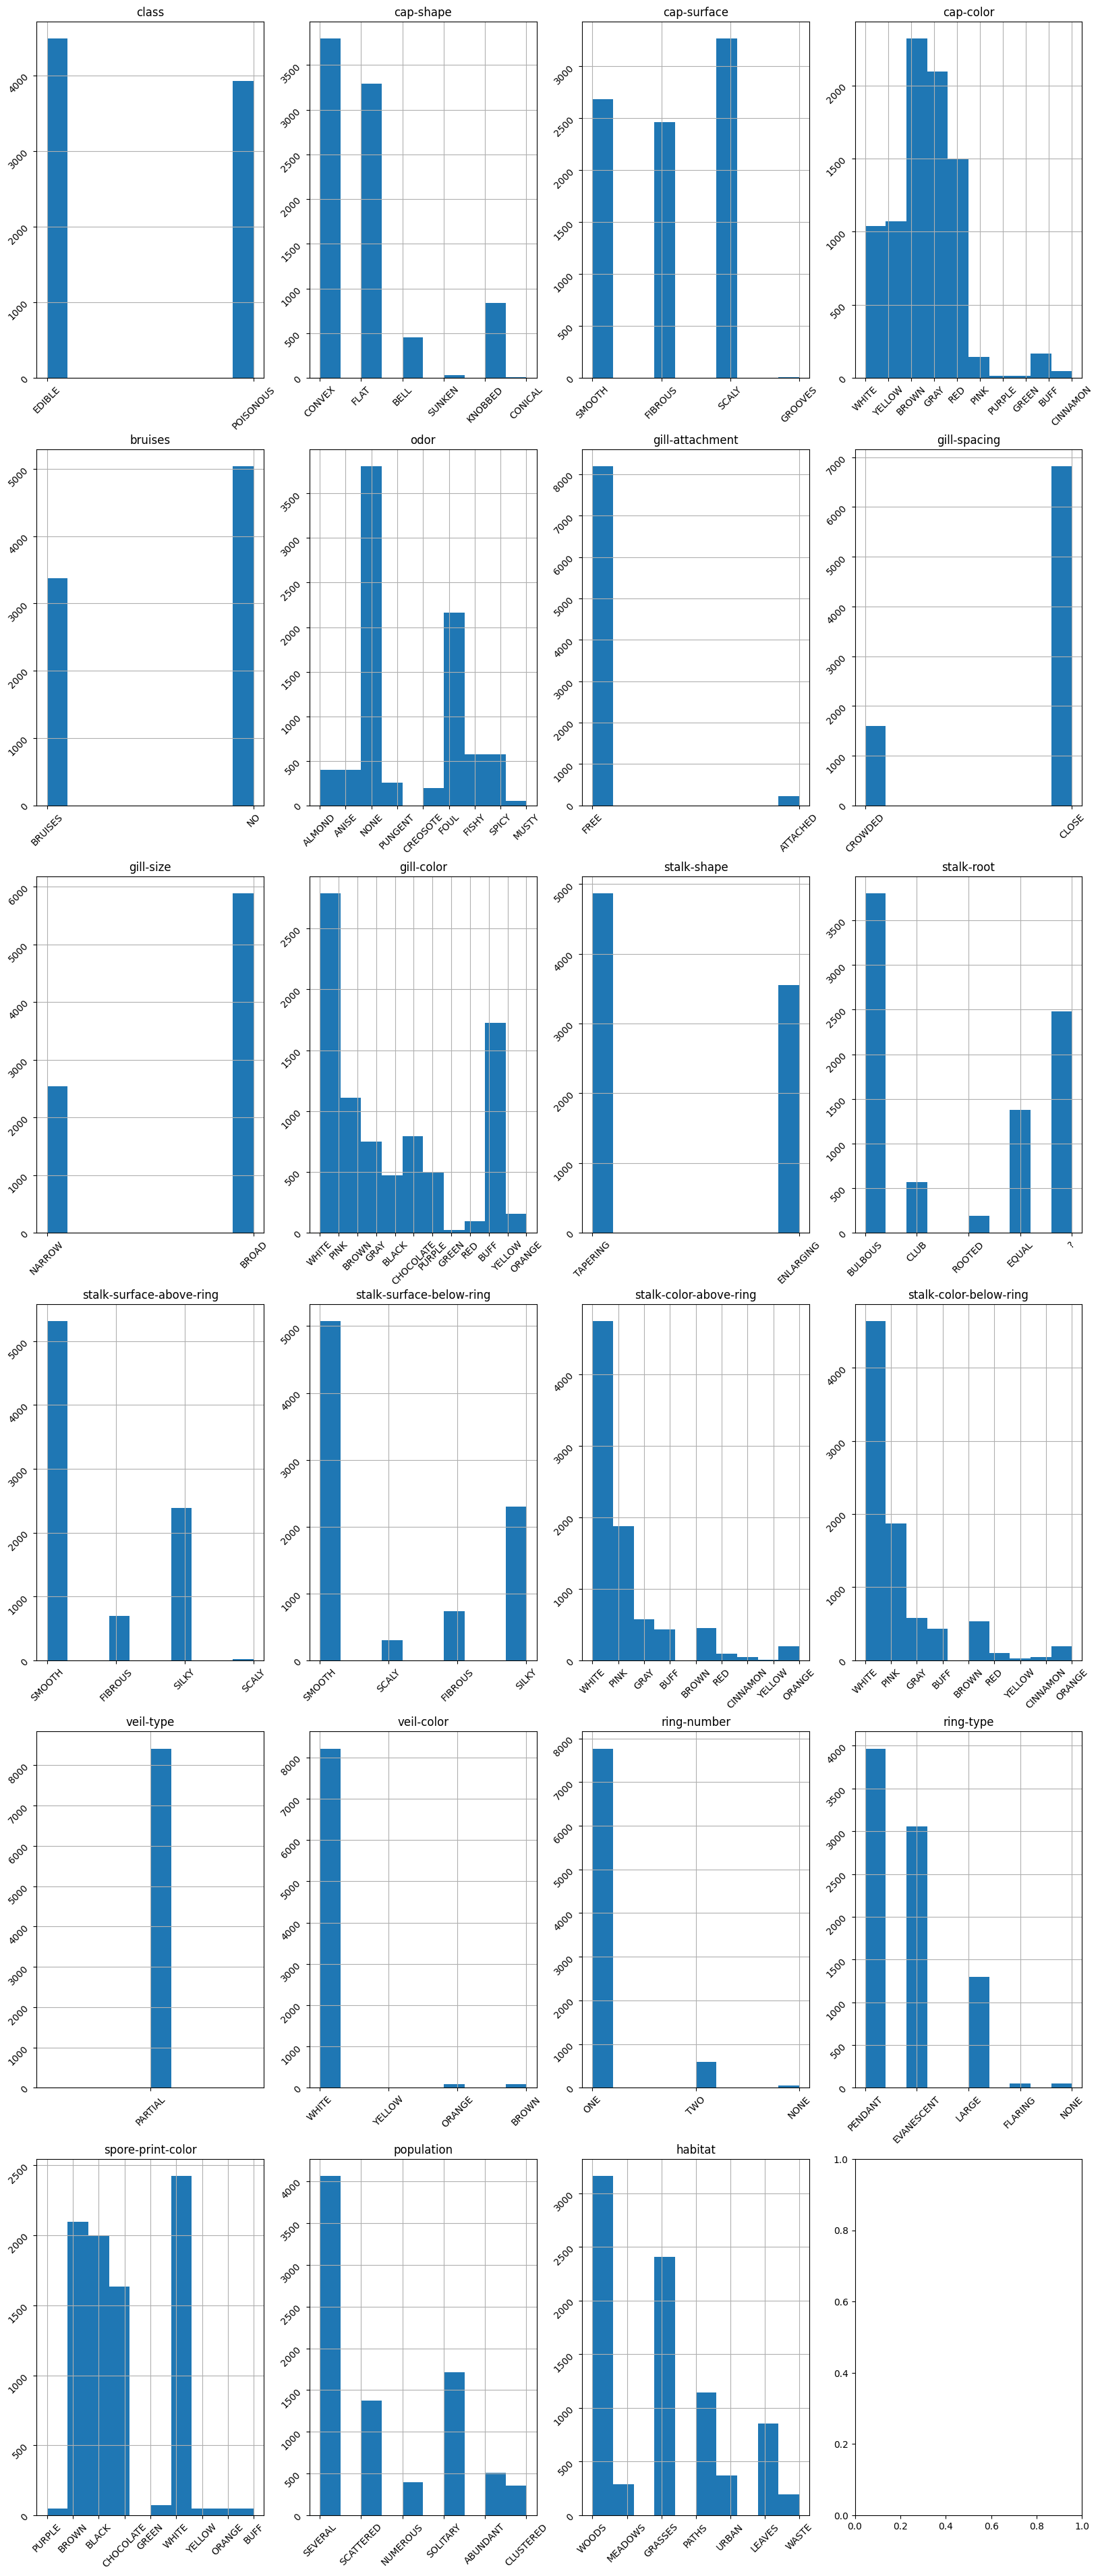

In [22]:
if columns % 4 == 0:
    f, ax = plt.subplots(int(columns // 4), 4, figsize=(20,int(columns // 4) * 8))
else:
    f, ax = plt.subplots(int(columns // 4) + 1, 4, figsize=(20,(int(columns // 4) + 1) * 8))

i = 0
j = 0
for column in df.columns:
    if j == 4:
        j = 0
        i += 1

    df[column].hist(ax=ax[i, j])
    ax[i, j].set_title(column)
    ax[i, j].tick_params(labelrotation=45)
    j += 1

## Баланс классов

<function matplotlib.pyplot.show(close=None, block=None)>

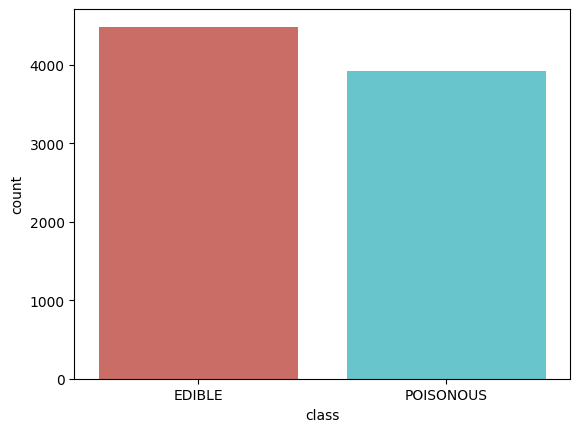

In [23]:
sns.countplot(x='class', data=pd.DataFrame(df['class']), palette='hls')
plt.show

## Обработка категориальных признаков

In [24]:
target_le = LabelEncoder()
df['class'] = target_le.fit_transform(df['class'])

for column in df.drop(columns=['class']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [25]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,6,4,6
1,0,2,3,8,0,0,1,1,1,10,1,1,3,3,7,7,0,2,1,4,1,4,6
2,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,6,4,6
3,0,2,3,8,0,0,1,1,1,7,1,1,3,3,7,7,0,2,1,4,1,4,6
4,0,2,3,8,0,0,1,1,1,1,1,1,3,3,7,7,0,2,1,4,6,4,6


In [26]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

## Важность признаков

In [27]:
rfc = RandomForestClassifier()
rfc.fit(df.drop(columns=['class']), df['class'])
imp = pd.Series(rfc.feature_importances_, df.drop(columns=['class']).columns[0:len(df.drop(columns=['class']).columns)]).sort_values()

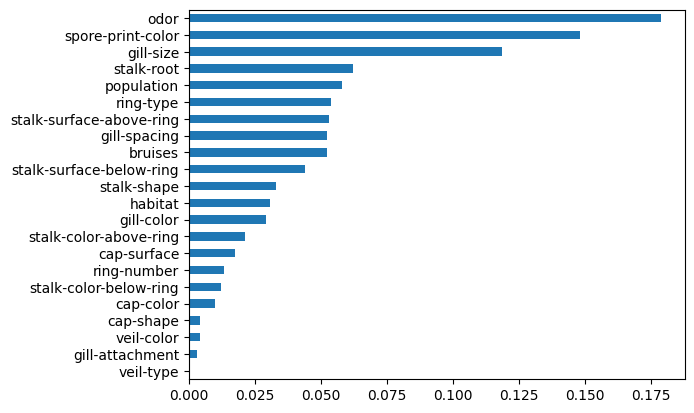

In [28]:
plt.figure()
imp.plot(kind='barh')
plt.show()

## Отбор признаков

In [29]:
df = df.drop(columns=['veil-type', 'veil-color', 'gill-attachment', 'cap-shape'])
rows, columns = df.shape

In [30]:
df.head()

,class,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,6,4,6
1,0,3,8,0,0,1,1,10,1,1,3,3,7,7,1,4,1,4,6
2,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,6,4,6
3,0,3,8,0,0,1,1,7,1,1,3,3,7,7,1,4,1,4,6
4,0,3,8,0,0,1,1,1,1,1,3,3,7,7,1,4,6,4,6


In [31]:
df.columns

Index(['class', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-spacing',
       'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Разделение датасета для обучения

In [32]:
X = df.drop(columns=['class'])
Y = pd.get_dummies(df['class'])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [34]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [35]:
print(f"Train dataset shape: {x_train.shape}, {y_train.shape}")
print(f"Test dataset shape:  {x_test.shape}, {y_test.shape}")

Train dataset shape: (5891, 18), (5891, 2)
Test dataset shape:  (2525, 18), (2525, 2)


# Решение

In [36]:
model = Network() 
model.add(Input(size=18)) 
model.add(Dense(size=15, activation=Sigmoid))
model.add(Dense(size=10, activation=Sigmoid))
model.add(Dense(size=2, activation=Sigmoid)) 
model.compile(loss=MSE) 
model.fit(X_train=x_train, Y_train=y_train, epochs=100, learning_rate=.01) 
y_pred = model.predict(X=x_test)

Epoch 0/100: loss=0.19730886590817814
Epoch 1/100: loss=0.13714277673002173
Epoch 2/100: loss=0.10715757098135531
Epoch 3/100: loss=0.092464428333921
Epoch 4/100: loss=0.08265880521930027
Epoch 5/100: loss=0.0756248532580463
Epoch 6/100: loss=0.06964193440350007
Epoch 7/100: loss=0.06445348736745245
Epoch 8/100: loss=0.06002208062679287
Epoch 9/100: loss=0.0559545099517493
Epoch 10/100: loss=0.05188348348374384
Epoch 11/100: loss=0.04739891035638831
Epoch 12/100: loss=0.04201677154757952
Epoch 13/100: loss=0.03615100144172476
Epoch 14/100: loss=0.030482953654732303
Epoch 15/100: loss=0.02555429040763198
Epoch 16/100: loss=0.021499722309844094
Epoch 17/100: loss=0.018698953155717103
Epoch 18/100: loss=0.01690776842264595
Epoch 19/100: loss=0.015604196713249505
Epoch 20/100: loss=0.014580947507200634
Epoch 21/100: loss=0.013745255963353997
Epoch 22/100: loss=0.013043650742430472
Epoch 23/100: loss=0.012441123234715544
Epoch 24/100: loss=0.011912613241823898
Epoch 25/100: loss=0.011438693

In [37]:
pred = list()
true = list() 
for i in range(len(y_pred)): 
    pred.append(np.argmax(y_pred[i]))
    true.append(np.argmax(y_test[i]))
true = target_le.inverse_transform(true)
pred = target_le.inverse_transform(pred)

# Результаты

## История обучения

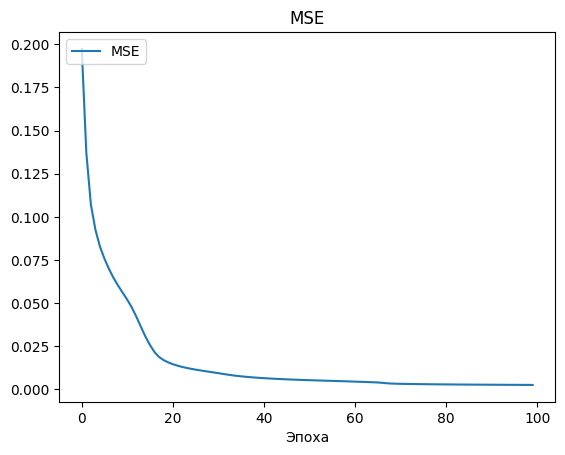

In [38]:
Plot.plot_history_trend(history=model.history, metric='MSE') 

## Метрики

In [39]:
Metric.print_classification_metrics(y_true=true, y_pred=pred)

           POISONOUS    EDIBLE
Accuracy    0.998020  0.998020
Precision   1.000000  0.996324
Recall      0.995726  1.000000
F1 score    0.997859  0.998158


## ROC-кривая

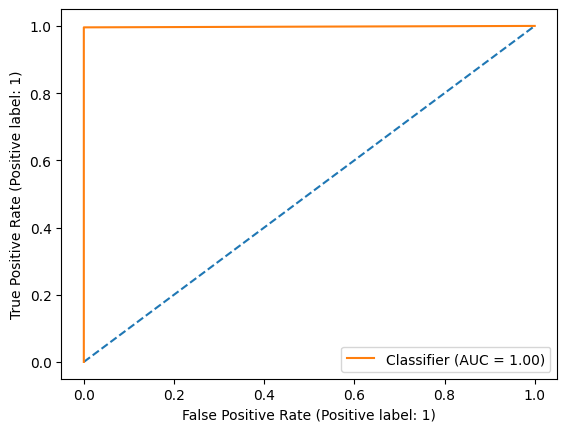

In [40]:
Plot.plot_roc_curve(y_true=target_le.transform(true), y_pred=target_le.transform(pred), labels=[1]) 

## Матрица ошибок

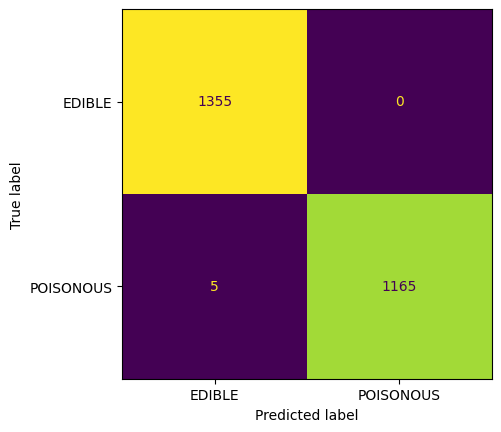

In [41]:
Plot.plot_confusion_matrix(y_true=true, y_pred=pred) 